### Отчет по продажам

In [1]:
# Импортируем библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Читаем данные из файлов:
data = pd.read_excel('data/Чеки.xlsx') 
data_plan = pd.read_excel('data/Чеки.xlsx', sheet_name='План') 

df = data.copy()
plan_df = data_plan.copy()

In [3]:
# Посмотрим на наши таблицы с данными:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Дата              1095 non-null   datetime64[ns]
 1   Количество чеков  1095 non-null   float64       
 2   Выручка           1095 non-null   float64       
 3   Подразделение     1095 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 34.3+ KB


In [4]:
plan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           36 non-null     datetime64[ns]
 1   Выручка план   36 non-null     int64         
 2   Подразделение  36 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 992.0+ bytes


In [5]:
# Добавим столбец со значением Среднего чека:
df['Средний чек'] = round(df['Выручка'] / df['Количество чеков'], 2)

In [6]:
# Построим графики Выручки в разрезе Подразделений за период времени.
# Для этого построим сводную таблицу по Подразделениям:
dinamic_by_store = df.pivot_table(values = 'Выручка', index = 'Дата', columns='Подразделение', aggfunc='sum').round(0)
dinamic_by_store.head()

Подразделение,Бар,Кафе,Магазин
Дата,,,
2017-01-01,5019.0,47057.0,178942.0
2017-01-02,15519.0,100325.0,366364.0
2017-01-03,17265.0,111139.0,313996.0
2017-01-04,14127.0,121135.0,283205.0
2017-01-05,17198.0,110455.0,339703.0


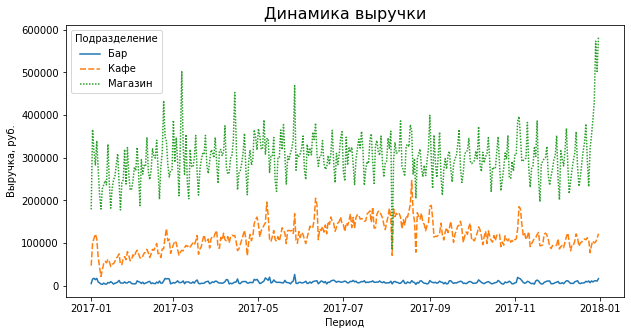

In [7]:
# Переходим к построению графиков:
fig = plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(data=dinamic_by_store)
lineplot.set_title('Динамика выручки', fontsize=16)
lineplot.set_xlabel('Период')
lineplot.set_ylabel('Выручка, руб.');

#### По графикам видим, что выручка на протяжении года по Магазину и Бару находится на одном уровне. В тоже время Выручка по Кафе увеличивается в летний период.

In [8]:
# Преобразуем Дату к формату datetime:
df['Дата'] =  pd.to_datetime(df['Дата'])

In [9]:
# Добавим столбец с указанеим Дня недели:
df['День недели'] = df['Дата'].dt.day_name()
df.head()

,Дата,Количество чеков,Выручка,Подразделение,Средний чек,День недели
0,2017-01-01,505.75,178942.4080,Магазин,353.82,Sunday
1,2017-01-02,952.00,366364.2800,Магазин,384.84,Monday
2,2017-01-03,833.85,313995.5505,Магазин,376.56,Tuesday
3,2017-01-04,680.85,283204.8190,Магазин,415.96,Wednesday
4,2017-01-05,789.65,339702.6615,Магазин,430.19,Thursday


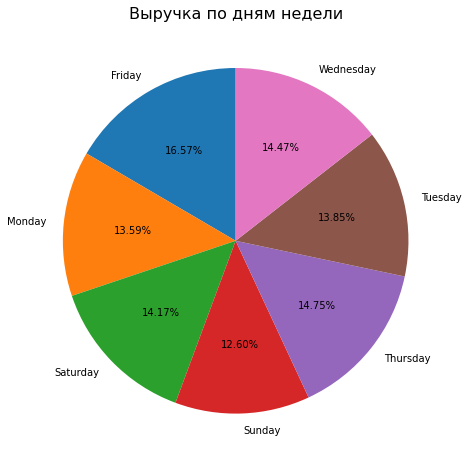

In [10]:
# Построим круговую диграмму с распределением Выручки по дням недели.
# Для этого сгруппируем наши данные по дням недели:
revenue_weekday = df.groupby(['День недели']).sum()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(
    revenue_weekday['Выручка'],
    labels=revenue_weekday.index,
    autopct='%1.2f%%',
    startangle=90
)
title = ax.set_title('Выручка по дням недели', fontsize=16)
plt.show(pie)

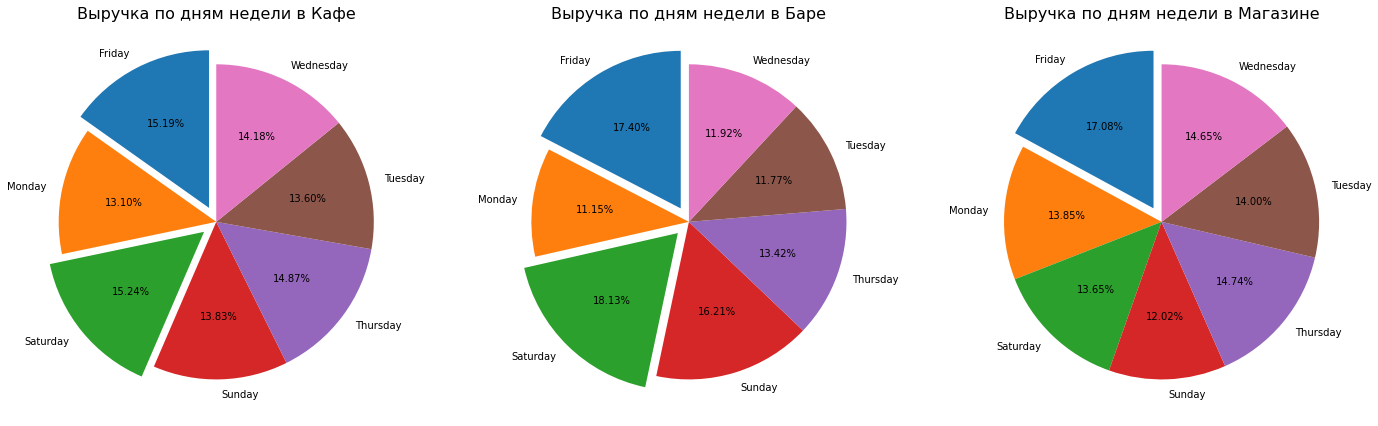

In [11]:
# Построим круговую диграмму с распределением Выручки по дням недели в разрезе подразделений:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12))
revenue_weekday_Cafe = df[df['Подразделение'] == 'Кафе'].groupby(['День недели']).sum()
ax = axes[0]
pie1 = ax.pie(
    revenue_weekday_Cafe['Выручка'],
    labels=revenue_weekday_Cafe.index,
    autopct='%1.2f%%',
    startangle=90,
    explode = [0.1,0,0.1,0,0,0,0]
)
title = ax.set_title('Выручка по дням недели в Кафе', fontsize=16)

revenue_weekday_Bar = df[df['Подразделение'] == 'Бар'].groupby(['День недели']).sum()
ax = axes[1]
pie2 = ax.pie(
    revenue_weekday_Bar['Выручка'],
    labels=revenue_weekday_Bar.index,
    autopct='%1.2f%%',
    startangle=90,
    explode = [0.1,0,0.1,0,0,0,0]
)
title = ax.set_title('Выручка по дням недели в Баре', fontsize=16)

revenue_weekday_Shop = df[df['Подразделение'] == 'Магазин'].groupby(['День недели']).sum()
ax = axes[2]
pie3 = ax.pie(
    revenue_weekday_Shop['Выручка'],
    labels=revenue_weekday_Shop.index,
    autopct='%1.2f%%',
    startangle=90,
    explode = [0.1,0,0,0,0,0,0]
)
title = ax.set_title('Выручка по дням недели в Магазине', fontsize=16)

#### По данным круговым диаграммам видим, что в Кафе наибольшая Выручка приходится на пятницу 15,19% и субботу 15,24%. В Кафе наибольшая выручка приходится также на пятницу 17,4% и субботу 18,13%. Причем выручка в понедельник, вторник и среду не достигает 12%. В Магазине наибольшая выручку приходится на пятницу 17,08%, а наименьшая на воскресенье 12,02%.

In [12]:
# Найдем значение среднего чека в разрезе подразделений:
AOV = df.groupby('Подразделение').mean().round(2).reset_index()

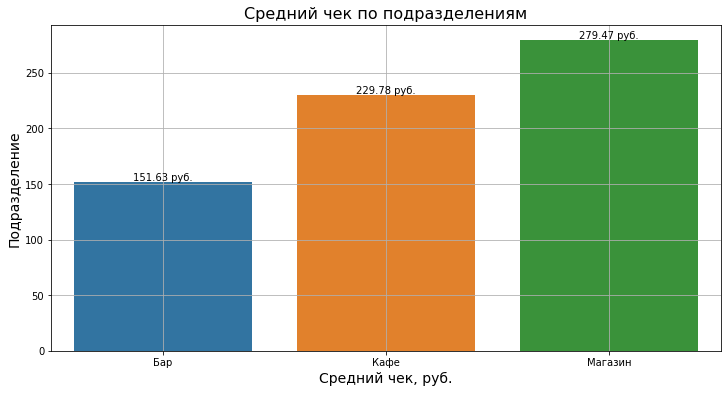

In [13]:
# Построим диаграмму, отображающую значение Среднего чека в разрезе Подразделений:
fig = plt.figure(figsize=(12, 6))
barplot1 = sns.barplot(
    data=AOV,
    x='Подразделение',
    y='Средний чек'
)
for index,data in enumerate(AOV['Средний чек']):
    plt.text(x=index , y =data , s=f"{data} руб." , fontdict=dict(fontsize=10), ha="center", va="bottom")
barplot1.set_title('Средний чек по подразделениям', fontsize=16);
barplot1.set_xlabel('Средний чек, руб.', fontsize=14);
barplot1.set_ylabel('Подразделение', fontsize=14);
barplot1.grid();

#### Из диаграммы видим, что средние чеки в разрезе подразделений отличаются. Наибольший в 279 руб. приходится на Магазин, а наименьший в 152 руб. приходится на Бар.

In [14]:
# Теперь посмотрим на выполнение плана по выручке.
# Для этого сгруппируем таблицы по Подразделениям:
df_group = df.groupby('Подразделение').sum().round(0)
df_plan_group = plan_df.groupby('Подразделение').sum()

In [15]:
# Объединим наши получившиеся таблицы:
df_total = df_group.merge(
    df_plan_group, 
    on = 'Подразделение',
    how = 'inner')

In [16]:
# Добавим столбец План выполнения, а также удалим лишние столбцы:
df_total['План выполенения, %'] = round(df_total['Выручка']*100 / df_total['Выручка план'], 2)
df_total = df_total.drop(['Количество чеков', 'Средний чек'], axis = 1)

In [17]:
# Посмотрим на итоговую таблицу:
df_total

,Выручка,Выручка план,"План выполенения, %"
Подразделение,,,
Бар,3009520.0,3145000,95.69
Кафе,42384497.0,44200000,95.89
Магазин,109433415.0,110500000,99.03


#### По данной таблице видим, что выполнение плана по выручке находится на уровне 96% для Бара и Кафе, и 99% - для Магазина.